In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [ ]:
data['Timestamp'] = data['Timestamp'].astype(float)

In [ ]:
data.dtypes

Timestamp            float64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [ ]:
data.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
data_nan = data.dropna()

In [ ]:
data_nan.reset_index(inplace=True, drop=True)
data_nan.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1.325347e+09,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1.325351e+09,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1.325351e+09,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1.325391e+09,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
data_nan.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

Linear Regression

In [ ]:
x = data_nan['Timestamp'].values
y = data_nan['Weighted_Price'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 random_state=2021)

In [ ]:
x_train = np.reshape(x_train,(-1,1))
x_test = np.reshape(x_test,(-1,1))
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2891015, 1)
(722754, 1)
(2891015, 1)
(722754, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

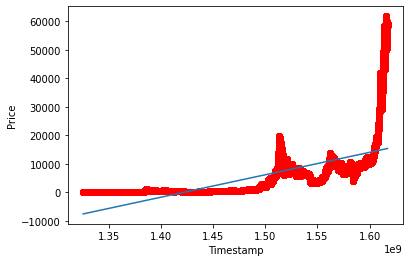

In [ ]:
x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x))
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()

In [ ]:
r_squared_linear = lin_reg.score(x,y)
print(r_squared_linear)

0.4234585335484554


Multiple Linear Regression

In [ ]:
x0 = data_nan.iloc[:,0:7].values
y0 = data_nan.iloc[:,-1].values

In [ ]:
import statsmodels.formula.api as sm
x0.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(3613769, 7)

In [ ]:
ones_array = np.ones((3613769,1),dtype=np.float)
ones_array.shape

(3613769, 1)

In [ ]:
x0 = np.append(ones_array,values=x0,axis=1)

In [ ]:
x_for_sm = x0[:,:]
x_for_sm.shape

(3613769, 8)

In [ ]:
import statsmodels.regression.linear_model as sm
mul_reg = sm.OLS(endog=y0,exog=x_for_sm)
mul_reg = mul_reg.fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.645e+12
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:25:38   Log-Likelihood:            -1.0115e+07
No. Observations:             3613769   AIC:                         2.023e+07
Df Residuals:                 3613761   BIC:                         2.023e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7031      0.055    -66.983      0.0

In [ ]:
x_for_sm = x_for_sm[:,0:6]

In [ ]:
mul_reg = sm.OLS(endog=y0,exog=x_for_sm)
mul_reg = mul_reg.fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.702e+12
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:25:40   Log-Likelihood:            -1.0115e+07
No. Observations:             3613769   AIC:                         2.023e+07
Df Residuals:                 3613763   BIC:                         2.023e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7578      0.055    -68.773      0.0

In [ ]:
x_for_sm = x_for_sm[:,[0,1,2,3,4]]
mul_reg = sm.OLS(endog=y0,exog=x_for_sm)
mul_reg = mul_reg.fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.550e+12
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:25:41   Log-Likelihood:            -1.0145e+07
No. Observations:             3613769   AIC:                         2.029e+07
Df Residuals:                 3613764   BIC:                         2.029e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6502      0.055    -66.245      0.0

In [ ]:
x_for_sm = x_for_sm[:,[0,1,2,3]]
mul_reg = sm.OLS(endog=y0,exog=x_for_sm)
mul_reg = mul_reg.fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.619e+12
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:25:43   Log-Likelihood:            -1.2532e+07
No. Observations:             3613769   AIC:                         2.506e+07
Df Residuals:                 3613765   BIC:                         2.506e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0348      0.106   -179.151      0.0

In [ ]:
x_for_sm = x_for_sm[:,[0,1,2]]
mul_reg = sm.OLS(endog=y0,exog=x_for_sm)
mul_reg = mul_reg.fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.346e+12
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:25:44   Log-Likelihood:            -1.3598e+07
No. Observations:             3613769   AIC:                         2.720e+07
Df Residuals:                 3613766   BIC:                         2.720e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6220      0.142    -39.509      0.0

In [ ]:
x_for_sm = x_for_sm[:,[0,1]]
mul_reg = sm.OLS(endog=y0,exog=x_for_sm)
mul_reg = mul_reg.fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 2.654e+06
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:25:45   Log-Likelihood:            -3.7034e+07
No. Observations:             3613769   AIC:                         7.407e+07
Df Residuals:                 3613767   BIC:                         7.407e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.118e+05     72.396  -1544.177      0.0

In [ ]:
x0 = x0[:,1:3]
x0

array([[1.32531792e+09, 4.39000000e+00],
       [1.32534660e+09, 4.39000000e+00],
       [1.32535074e+09, 4.50000000e+00],
       ...,
       [1.61714868e+09, 5.86934300e+04],
       [1.61714874e+09, 5.87421800e+04],
       [1.61714880e+09, 5.87677500e+04]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train0,x_test0,y_train0,y_test0 = train_test_split(x0,y0,test_size=0.2,
                                                 random_state=2021)

In [ ]:
y_train0 = np.reshape(y_train,(-1,1))
y_test0 = np.reshape(y_test,(-1,1))
print(x_train0.shape)
print(x_test0.shape)
print(y_train0.shape)
print(y_test0.shape)

(2891015, 2)
(722754, 2)
(2891015, 1)
(722754, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
mul_reg0 = LinearRegression()
mul_reg0.fit(x_train0,y_train0)
y_pred0 = mul_reg0.predict(x_test0)

In [ ]:
r_squared_multiple = mul_reg0.score(x0,y0)
print(r_squared_multiple)

0.999998658042766


Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
poly_lin_reg = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=25)
x_for_pol = poly_reg.fit_transform(x)
poly_lin_reg.fit(x_for_pol,y)
y_pred1 = poly_lin_reg.predict(x_for_pol)

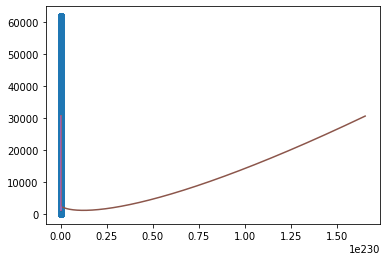

In [ ]:
plt.scatter(x,y)
plt.plot(x_for_pol,y_pred1)
plt.show()

In [ ]:
r_squared_poly = poly_lin_reg.score(x_for_pol,y)
print(r_squared_poly)

0.6581473750896255
